In [31]:
import os
import glob
import cv2
import img
import importlib
from bs4 import BeautifulSoup
import lxml
import pytesseract as tess

importlib.reload(img)

print("OpenCV version: {}".format(cv2.__version__))
print("Tesseract version: {}".format(tess.get_tesseract_version()))

OpenCV version: 4.7.0
Tesseract version: 5.3.1


In [32]:
IMAGES_PATH = os.path.join("annotations", "images")
ANNOTATIONS_PATH = os.path.join("annotations", "annotations")
TRAIN_PATH = os.path.join("tesstrain", "data", "plates2-ground-truth")

ANNOTATIONS = glob.glob(os.path.join(ANNOTATIONS_PATH, "*.xml"))
IMAGES = glob.glob(os.path.join(IMAGES_PATH, "*.jpg"))

In [33]:
ANNOTATIONS

['ocr/annotations/5CarLongPlate310.xml',
 'ocr/annotations/iwt7129.xml',
 'ocr/annotations/1xemay2373.xml',
 'ocr/annotations/iwt235.xml',
 'ocr/annotations/2xemay162.xml',
 'ocr/annotations/3CarLongPlate941.xml',
 'ocr/annotations/5xemay2384.xml',
 'ocr/annotations/3CarLongPlate799.xml',
 'ocr/annotations/iwt7115.xml',
 'ocr/annotations/5xemay1699.xml',
 'ocr/annotations/iwt7101.xml',
 'ocr/annotations/4CarLongPlate530.xml',
 'ocr/annotations/iwt221.xml',
 'ocr/annotations/9xemay1438.xml',
 'ocr/annotations/12xemay1241.xml',
 'ocr/annotations/2PlateBaza280.xml',
 'ocr/annotations/3xemay1067.xml',
 'ocr/annotations/5xemay620.xml',
 'ocr/annotations/1xemay1861.xml',
 'ocr/annotations/1xemay2398.xml',
 'ocr/annotations/9xemay1362.xml',
 'ocr/annotations/2xemay2145.xml',
 'ocr/annotations/4xemay2036.xml',
 'ocr/annotations/9xemay1410.xml',
 'ocr/annotations/6xemay451.xml',
 'ocr/annotations/6PlateBaza202.xml',
 'ocr/annotations/1xemay677.xml',
 'ocr/annotations/iwt779.xml',
 'ocr/annotati

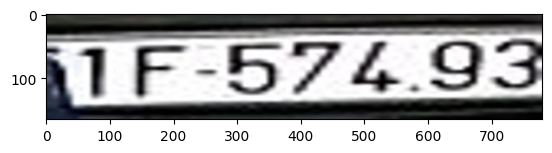

In [34]:
def load_image_from_annotation(annotation_path: str):
    """Load image from annotation path"""
    image_path = os.path.join(IMAGES_PATH, os.path.basename(annotation_path).replace(".xml", ".jpg"))
    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

img.show(load_image_from_annotation(ANNOTATIONS[0]))

F157493


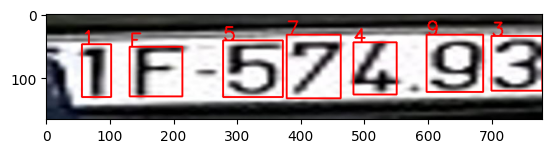

In [35]:
def load_annotation(annotation_path: str):
    image = load_image_from_annotation(annotation_path)
    data = open(annotation_path, "r").read()
    bs_data = BeautifulSoup(data, "lxml")
    xml_objects = bs_data.find_all("object")
    objects = []
    for xml_object in xml_objects:
        name = xml_object.find("name").text
        xmin = int(xml_object.find("xmin").text)
        ymin = int(xml_object.find("ymin").text)
        xmax = int(xml_object.find("xmax").text)
        ymax = int(xml_object.find("ymax").text)
        objects.append((name, xmin, ymin, xmax, ymax))
    
    text = "".join([o[0] for o in objects])

    return text, image, objects

def draw_objects(image, objects):
    image = image.copy()
    for name, xmin, ymin, xmax, ymax in objects:
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(image, name, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    return image

text, image, objects = load_annotation(ANNOTATIONS[0])
print(text)
img.show(draw_objects(image, objects))

In [36]:
def save_to_dataset(text, image, path):
    # write image to file in png format
    image_path = os.path.join(path, text + ".png")
    cv2.imwrite(image_path, image)

    # create text file with text
    text_path = os.path.join(path, text + ".gt.txt")
    with open(text_path, "w+") as f:
        f.write(text)

for annotation in ANNOTATIONS:
    text, image, objects = load_annotation(annotation)
    save_to_dataset(text, image, TRAIN_PATH)